In [2]:
! pip install baostock

import baostock as bs
import pandas as pd
import datetime

  Using cached baostock-0.8.8-py3-none-any.whl (55 kB)


# 证券宝（网址www.baostock.com）是一个免费、开源的证券数据平台，最重要的是：无需注册。
pip install baostock
或使用国内源安装：
pip install baostock -i https://pypi.tuna.tsinghua.edu.cn/simple/ --trusted-host pypi.tuna.tsinghua.edu.cn

## 获取指定股票历史数据

In [15]:
code = "sz.002484" #查询的股票代码
datestart = '2016-07-01' #开始时间
datetoday = datetime.datetime.today().strftime("%Y-%m-%d")

In [16]:
datetoday

'2023-08-31'

In [17]:
ShowList ="date,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,tradestatus,pctChg,isST"
ShowList

'date,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,tradestatus,pctChg,isST'

## 获取记录，将记录合并在一起

In [18]:
def ListToDf(rs):
    data_list = []
    while (rs.error_code == '0') & rs.next():
        data_list.append(rs.get_row_data())
        result = pd.DataFrame(data_list, columns=rs.fields)
    return result

## 登陆系统 

In [19]:
lg = bs.login()

print('login respond error_msg:'+lg.error_msg)

login success!
login respond error_msg:success


In [20]:
rs = bs.query_history_k_data_plus(code,ShowList,start_date=datestart, end_date=datetoday,frequency="d", adjustflag="3")


In [21]:
result = ListToDf(rs)

## 获取沪深A股历史K线数据

In [22]:
result

,date,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,tradestatus,pctChg,isST
0,2016-07-01,sz.002484,15.3700,15.4900,15.0700,15.1900,15.2500,12385472,189022048.0000,3,2.530199,1,-0.393400,0
1,2016-07-04,sz.002484,15.0300,15.5900,15.0000,15.5900,15.1900,12657444,194466115.0000,3,2.585759,1,2.633300,0
2,2016-07-05,sz.002484,15.6200,15.6500,15.2300,15.3600,15.5900,9792592,151022382.0000,3,2.000505,1,-1.475300,0
3,2016-07-06,sz.002484,15.6000,15.6900,15.1900,15.2900,15.3600,11950247,184347510.0000,3,2.441288,1,-0.455700,0
4,2016-07-07,sz.002484,15.2300,15.5800,14.9000,15.4200,15.2900,13720338,208298739.0000,3,2.802895,1,0.850200,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1739,2023-08-24,sz.002484,16.6500,17.0800,16.1600,16.7100,16.3200,12759522,211781082.7100,3,1.605700,1,2.389700,0
1740,2023-08-25,sz.002484,16.7600,17.0500,16.6300,16.7000,16.7100,9268913,155728267.6100,3,1.166400,1,-0.059800,0
1741,2023-08-28,sz.002484,17.9800,17.9800,17.1500,17.4300,16.7000,12986553,226330266.4500,3,1.634200,1,4.371300,0
1742,2023-08-29,sz.002484,17.3800,18.2100,17.2100,18.0900,17.4300,10706543,191029738.6400,3,1.347300,1,3.786600,0


In [11]:
print('query_history_k_data_plus respond error_msg:'+rs.error_msg)

query_history_k_data_plus respond error_msg:success


## 结果集输出到csv文件

In [12]:
result.to_csv('history_A_stock_k_' + code + '.csv', index=False)

In [13]:
pd.read_csv('history_A_stock_k_' + code + '.csv')

,date,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,tradestatus,pctChg,isST
0,2019-07-01,sz.002484,6.19,6.28,6.14,6.27,6.06,16357932,1.012276e+08,3,2.142080,1,3.465347,0
1,2019-07-02,sz.002484,6.27,6.29,6.19,6.23,6.27,10547447,6.576962e+07,3,1.381194,1,-0.637958,0
2,2019-07-03,sz.002484,6.22,6.22,6.08,6.10,6.23,6266504,3.835492e+07,3,0.820602,1,-2.086679,0
3,2019-07-04,sz.002484,6.11,6.14,6.06,6.08,6.10,3610427,2.201540e+07,3,0.472787,1,-0.327869,0
4,2019-07-05,sz.002484,6.09,6.38,6.05,6.17,6.08,8952717,5.530906e+07,3,1.172363,1,1.480266,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010,2023-08-24,sz.002484,16.65,17.08,16.16,16.71,16.32,12759522,2.117811e+08,3,1.605700,1,2.389700,0
1011,2023-08-25,sz.002484,16.76,17.05,16.63,16.70,16.71,9268913,1.557283e+08,3,1.166400,1,-0.059800,0
1012,2023-08-28,sz.002484,17.98,17.98,17.15,17.43,16.70,12986553,2.263303e+08,3,1.634200,1,4.371300,0
1013,2023-08-29,sz.002484,17.38,18.21,17.21,18.09,17.43,10706543,1.910297e+08,3,1.347300,1,3.786600,0


In [14]:
bs.logout()

logout success!


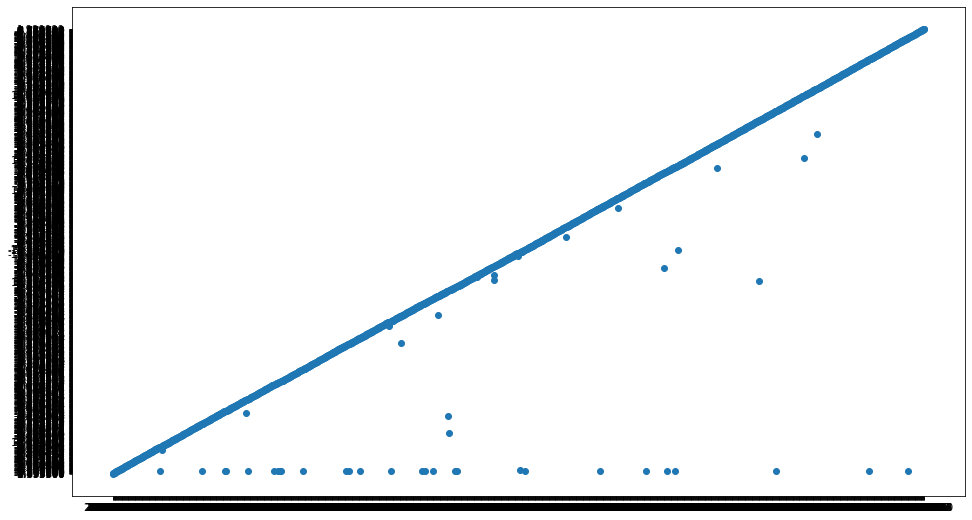

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,9))
plt.scatter(x=result.date,y=result.pctChg)